# **A. Exploratory Data Analysis (EDA)**

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 2. Load the Dataset

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 3. Initial Data Exploration

In [3]:
# Check for missing values
print(df.isnull().sum())
# Summary statistics
print(df.describe())
# Distribution of target variable
print(df['target'].value_counts())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800

## 4. Data Visualization

### PairPlot

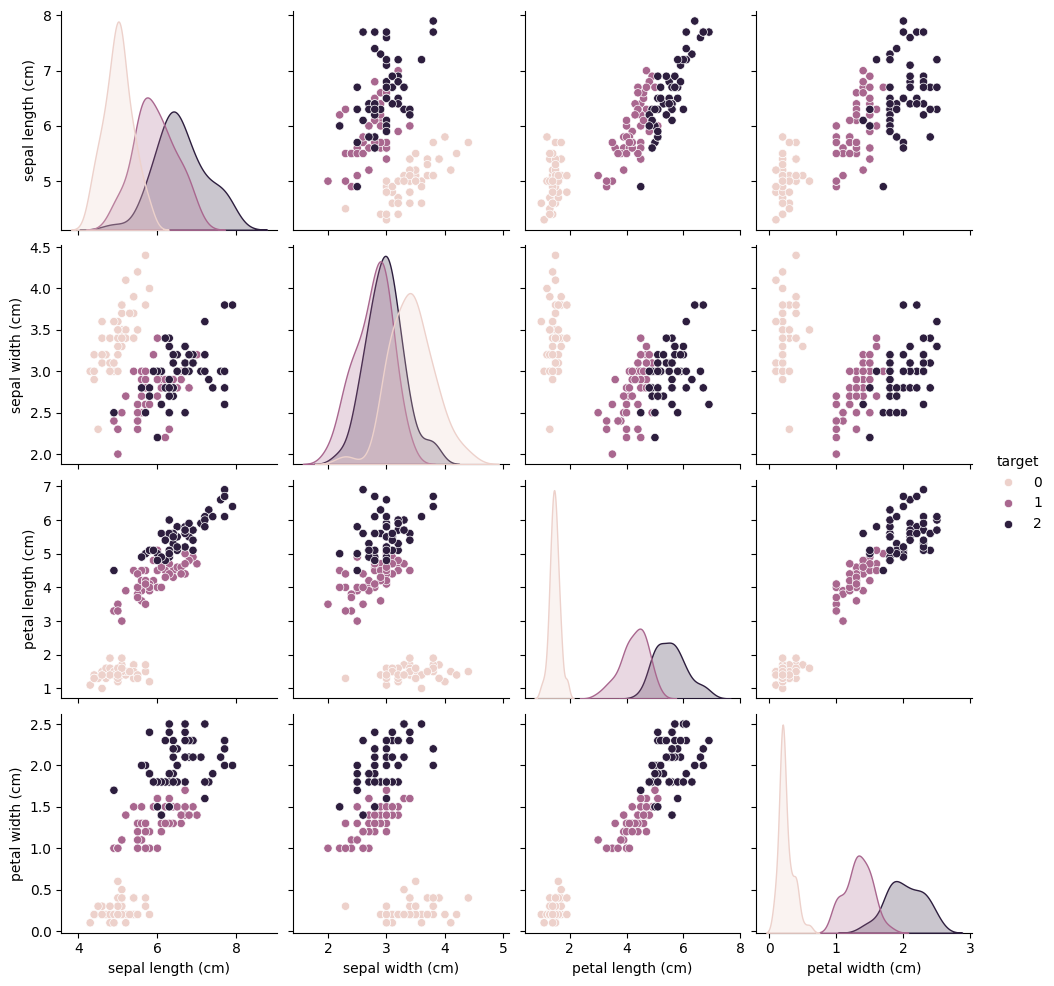

In [4]:
sns.pairplot(df, hue="target", diag_kind="kde")
plt.show()

### Correlation Matrix

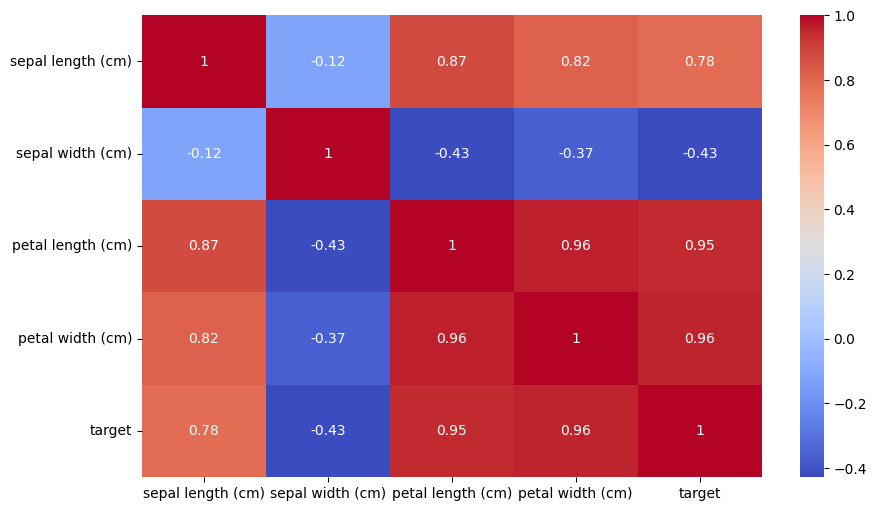

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


### Boxplot

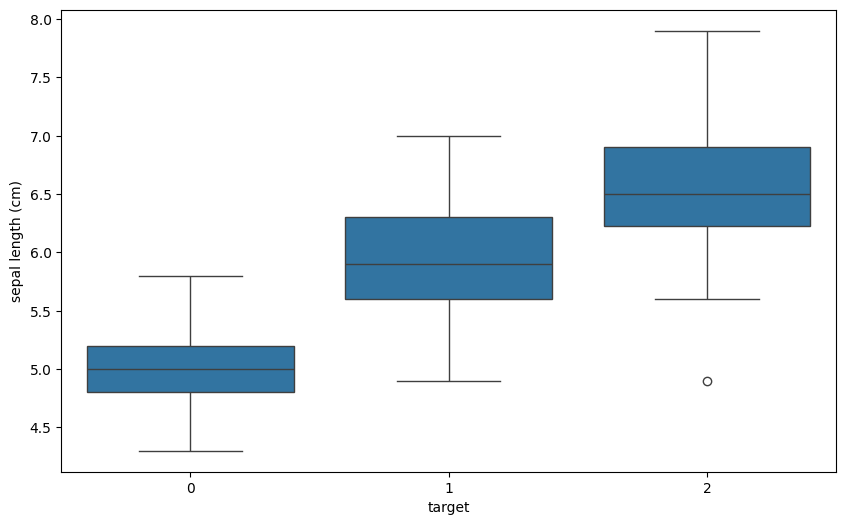

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='sepal length (cm)')
plt.show()

# **B. Data Cleaning**

## 1. Import Libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from scipy import stats

## 2. Load the Dataset

In [9]:
# Sample data with missing values, duplicates, and outliers
data = {
   'Age': [25, 30, np.nan, 40, 29, 25, 200, 22, 24, 29, np.nan, 28, 30],
   'Salary': [50000, 60000, 75000, 85000, np.nan, 50000, 100000, 55000, 48000, 62000, np.nan, 65000, 61000],
   'City': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Chicago', 'new york', 'los angeles', 'chicago', 'New York', 'Chicago', 'New York', 'Los Angeles', 'Los Angeles']
}
df = pd.DataFrame(data)
df.loc[13] = df.loc[0]  # Add a duplicate row
df.head(15)

,Age,Salary,City
0,25.0,50000.0,New York
1,30.0,60000.0,Los Angeles
2,NaN,75000.0,New York
3,40.0,85000.0,Chicago
4,29.0,NaN,Chicago
5,25.0,50000.0,new york
6,200.0,100000.0,los angeles
7,22.0,55000.0,chicago
8,24.0,48000.0,New York
9,29.0,62000.0,Chicago


## 3. Handling Missing Data

### Removing Rows with Missing Values

In [10]:
# Remove rows with any missing values
df_dropped_na = df.dropna()
print("Data after dropping rows with missing values:\n", df_dropped_na)

Data after dropping rows with missing values:
       Age    Salary         City
0    25.0   50000.0     New York
1    30.0   60000.0  Los Angeles
3    40.0   85000.0      Chicago
5    25.0   50000.0     new york
6   200.0  100000.0  los angeles
7    22.0   55000.0      chicago
8    24.0   48000.0     New York
9    29.0   62000.0      Chicago
11   28.0   65000.0  Los Angeles
12   30.0   61000.0  Los Angeles
13   25.0   50000.0     New York


### Imputing Missing Values

In [11]:
# Impute missing values in 'Age' and 'Salary' with the mean
imputer = SimpleImputer(strategy='mean')
df[['Age', 'Salary']] = imputer.fit_transform(df[['Age', 'Salary']])
print("Data after imputation:\n", df)

Data after imputation:
        Age         Salary         City
0    25.00   50000.000000     New York
1    30.00   60000.000000  Los Angeles
2    42.25   75000.000000     New York
3    40.00   85000.000000      Chicago
4    29.00   63416.666667      Chicago
5    25.00   50000.000000     new york
6   200.00  100000.000000  los angeles
7    22.00   55000.000000      chicago
8    24.00   48000.000000     New York
9    29.00   62000.000000      Chicago
10   42.25   63416.666667     New York
11   28.00   65000.000000  Los Angeles
12   30.00   61000.000000  Los Angeles
13   25.00   50000.000000     New York


## 4. Removing Duplicates

In [12]:
# Remove duplicate rows
df = df.drop_duplicates()
print("Data after removing duplicates:\n", df)

Data after removing duplicates:
        Age         Salary         City
0    25.00   50000.000000     New York
1    30.00   60000.000000  Los Angeles
2    42.25   75000.000000     New York
3    40.00   85000.000000      Chicago
4    29.00   63416.666667      Chicago
5    25.00   50000.000000     new york
6   200.00  100000.000000  los angeles
7    22.00   55000.000000      chicago
8    24.00   48000.000000     New York
9    29.00   62000.000000      Chicago
10   42.25   63416.666667     New York
11   28.00   65000.000000  Los Angeles
12   30.00   61000.000000  Los Angeles


## 5. Removing Outliers

In [13]:
# Calculate Z-scores to detect outliers in 'Age' and 'Salary'
z_scores = np.abs(stats.zscore(df[['Age', 'Salary']]))
df_no_outliers = df[(z_scores < 3).all(axis=1)]  # Only keep rows where all Z-scores are < 3
print("Data after removing outliers:\n", df_no_outliers)

Data after removing outliers:
       Age        Salary         City
0   25.00  50000.000000     New York
1   30.00  60000.000000  Los Angeles
2   42.25  75000.000000     New York
3   40.00  85000.000000      Chicago
4   29.00  63416.666667      Chicago
5   25.00  50000.000000     new york
7   22.00  55000.000000      chicago
8   24.00  48000.000000     New York
9   29.00  62000.000000      Chicago
10  42.25  63416.666667     New York
11  28.00  65000.000000  Los Angeles
12  30.00  61000.000000  Los Angeles


## 6. Dealing with Inconsistent Data

### Standardizing Categorical Data

In [14]:
# Standardize 'City' names to title case
df['City'] = df['City'].str.title()
# Check unique values to verify consistency
print("Unique values in 'City':", df['City'].unique())
df

Unique values in 'City': ['New York' 'Los Angeles' 'Chicago']


,Age,Salary,City
0,25.00,50000.000000,New York
1,30.00,60000.000000,Los Angeles
2,42.25,75000.000000,New York
3,40.00,85000.000000,Chicago
4,29.00,63416.666667,Chicago
5,25.00,50000.000000,New York
6,200.00,100000.000000,Los Angeles
7,22.00,55000.000000,Chicago
8,24.00,48000.000000,New York
9,29.00,62000.000000,Chicago


### Handling Incorrect Values

In [15]:
# Fix incorrect age values (assuming age should be <= 100)
df.loc[df['Age'] > 100, 'Age'] = np.nan  # Set unrealistic ages to NaN
df['Age'] = imputer.fit_transform(df[['Age']])  # Impute the new NaN values
print("Data after handling incorrect values:\n", df)

Data after handling incorrect values:
           Age         Salary         City
0   25.000000   50000.000000     New York
1   30.000000   60000.000000  Los Angeles
2   42.250000   75000.000000     New York
3   40.000000   85000.000000      Chicago
4   29.000000   63416.666667      Chicago
5   25.000000   50000.000000     New York
6   30.541667  100000.000000  Los Angeles
7   22.000000   55000.000000      Chicago
8   24.000000   48000.000000     New York
9   29.000000   62000.000000      Chicago
10  42.250000   63416.666667     New York
11  28.000000   65000.000000  Los Angeles
12  30.000000   61000.000000  Los Angeles


## 7. Summary of Cleaned Data

In [16]:
print("Final cleaned data:\n", df)

Final cleaned data:
           Age         Salary         City
0   25.000000   50000.000000     New York
1   30.000000   60000.000000  Los Angeles
2   42.250000   75000.000000     New York
3   40.000000   85000.000000      Chicago
4   29.000000   63416.666667      Chicago
5   25.000000   50000.000000     New York
6   30.541667  100000.000000  Los Angeles
7   22.000000   55000.000000      Chicago
8   24.000000   48000.000000     New York
9   29.000000   62000.000000      Chicago
10  42.250000   63416.666667     New York
11  28.000000   65000.000000  Los Angeles
12  30.000000   61000.000000  Los Angeles


# **C. Data Transformation**

## 1. Import Libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

## 2. Load Sample Data

In [18]:
data = {
   'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Chicago', 'Los Angeles', 'Chicago'],
   'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female'],
   'Age': [25, 30, 45, 35, 50, 23, 40],
   'Income': [50000, 60000, 75000, 80000, 90000, 40000, 65000]
}
df = pd.DataFrame(data)
print("Original Data:\n", df)

Original Data:
           City  Gender  Age  Income
0     New York    Male   25   50000
1  Los Angeles  Female   30   60000
2      Chicago  Female   45   75000
3     New York    Male   35   80000
4      Chicago  Female   50   90000
5  Los Angeles    Male   23   40000
6      Chicago  Female   40   65000


## 3. Label Encoding

In [19]:
# Apply Label Encoding to the 'Gender' column
label_encoder = LabelEncoder()
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
print("\nData after Label Encoding 'Gender':\n", df)


Data after Label Encoding 'Gender':
           City  Gender  Age  Income  Gender_encoded
0     New York    Male   25   50000               1
1  Los Angeles  Female   30   60000               0
2      Chicago  Female   45   75000               0
3     New York    Male   35   80000               1
4      Chicago  Female   50   90000               0
5  Los Angeles    Male   23   40000               1
6      Chicago  Female   40   65000               0


## 4. One-Hot Encoding

In [20]:
# Apply One-Hot Encoding to the 'City' column
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[['City']])
# Convert to DataFrame and merge with original data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['City']))
df = pd.concat([df, one_hot_df], axis=1)
print("\nData after One-Hot Encoding 'City':\n", df)


Data after One-Hot Encoding 'City':
           City  Gender  Age  Income  Gender_encoded  City_Chicago  \
0     New York    Male   25   50000               1           0.0   
1  Los Angeles  Female   30   60000               0           0.0   
2      Chicago  Female   45   75000               0           1.0   
3     New York    Male   35   80000               1           0.0   
4      Chicago  Female   50   90000               0           1.0   
5  Los Angeles    Male   23   40000               1           0.0   
6      Chicago  Female   40   65000               0           1.0   

   City_Los Angeles  City_New York  
0               0.0            1.0  
1               1.0            0.0  
2               0.0            0.0  
3               0.0            1.0  
4               0.0            0.0  
5               1.0            0.0  
6               0.0            0.0  


## 5. Normalization vs Standardization

### Normalization (Min-Max Scaling)

In [21]:
# Apply Min-Max Scaling to 'Age' and 'Income' columns
min_max_scaler = MinMaxScaler()
df[['Age_normalized', 'Income_normalized']] = min_max_scaler.fit_transform(df[['Age', 'Income']])
print("\nData after Normalization (Min-Max Scaling):\n", df)


Data after Normalization (Min-Max Scaling):
           City  Gender  Age  Income  Gender_encoded  City_Chicago  \
0     New York    Male   25   50000               1           0.0   
1  Los Angeles  Female   30   60000               0           0.0   
2      Chicago  Female   45   75000               0           1.0   
3     New York    Male   35   80000               1           0.0   
4      Chicago  Female   50   90000               0           1.0   
5  Los Angeles    Male   23   40000               1           0.0   
6      Chicago  Female   40   65000               0           1.0   

   City_Los Angeles  City_New York  Age_normalized  Income_normalized  
0               0.0            1.0        0.074074                0.2  
1               1.0            0.0        0.259259                0.4  
2               0.0            0.0        0.814815                0.7  
3               0.0            1.0        0.444444                0.8  
4               0.0            0.0       

### Standardization (Z-Score scaling)

In [22]:
# Apply Standard Scaling to 'Age' and 'Income' columns
standard_scaler = StandardScaler()
df[['Age_standardized', 'Income_standardized']] = standard_scaler.fit_transform(df[['Age', 'Income']])
print("\nData after Standardization:\n", df)


Data after Standardization:
           City  Gender  Age  Income  Gender_encoded  City_Chicago  \
0     New York    Male   25   50000               1           0.0   
1  Los Angeles  Female   30   60000               0           0.0   
2      Chicago  Female   45   75000               0           1.0   
3     New York    Male   35   80000               1           0.0   
4      Chicago  Female   50   90000               0           1.0   
5  Los Angeles    Male   23   40000               1           0.0   
6      Chicago  Female   40   65000               0           1.0   

   City_Los Angeles  City_New York  Age_normalized  Income_normalized  \
0               0.0            1.0        0.074074                0.2   
1               1.0            0.0        0.259259                0.4   
2               0.0            0.0        0.814815                0.7   
3               0.0            1.0        0.444444                0.8   
4               0.0            0.0        1.000000  

# D. Feature Engineering

## 1. Import Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer, PolynomialFeatures

## 2. Create Sample Data

In [24]:
# Sample data
data = {
   'timestamp': pd.date_range(start='2023-01-01', end='2023-02-01', periods=10),
   'temperature': [22, 23, 21, 20, 19, 18, 17, 22, 21, 19],
   'humidity': [55, 60, 65, 70, 68, 64, 59, 58, 61, 63]
}
df = pd.DataFrame(data)
print("Original Data:\n", df)

Original Data:
             timestamp  temperature  humidity
0 2023-01-01 00:00:00           22        55
1 2023-01-04 10:40:00           23        60
2 2023-01-07 21:20:00           21        65
3 2023-01-11 08:00:00           20        70
4 2023-01-14 18:40:00           19        68
5 2023-01-18 05:20:00           18        64
6 2023-01-21 16:00:00           17        59
7 2023-01-25 02:40:00           22        58
8 2023-01-28 13:20:00           21        61
9 2023-02-01 00:00:00           19        63


## 3. Feature Decomposition

In [25]:
# Decomposing the 'timestamp' column
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek  # Monday=0, Sunday=6
print("\nData after Decomposition:\n", df)


Data after Decomposition:
             timestamp  temperature  humidity  hour  day_of_week
0 2023-01-01 00:00:00           22        55     0            6
1 2023-01-04 10:40:00           23        60    10            2
2 2023-01-07 21:20:00           21        65    21            5
3 2023-01-11 08:00:00           20        70     8            2
4 2023-01-14 18:40:00           19        68    18            5
5 2023-01-18 05:20:00           18        64     5            2
6 2023-01-21 16:00:00           17        59    16            5
7 2023-01-25 02:40:00           22        58     2            2
8 2023-01-28 13:20:00           21        61    13            5
9 2023-02-01 00:00:00           19        63     0            2


## 4. Crossing Features

In [26]:
# Using PolynomialFeatures to create interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_features = poly.fit_transform(df[['hour', 'temperature']])
interaction_df = pd.DataFrame(interaction_features, columns=poly.get_feature_names_out(['hour', 'temperature']))
# Adding interaction terms to original DataFrame
df = pd.concat([df.drop(columns=['hour', 'temperature']), interaction_df], axis=1)
print("\nData after Feature Crossing:\n", df)


Data after Feature Crossing:
             timestamp  humidity  day_of_week  hour  temperature  \
0 2023-01-01 00:00:00        55            6   0.0         22.0   
1 2023-01-04 10:40:00        60            2  10.0         23.0   
2 2023-01-07 21:20:00        65            5  21.0         21.0   
3 2023-01-11 08:00:00        70            2   8.0         20.0   
4 2023-01-14 18:40:00        68            5  18.0         19.0   
5 2023-01-18 05:20:00        64            2   5.0         18.0   
6 2023-01-21 16:00:00        59            5  16.0         17.0   
7 2023-01-25 02:40:00        58            2   2.0         22.0   
8 2023-01-28 13:20:00        61            5  13.0         21.0   
9 2023-02-01 00:00:00        63            2   0.0         19.0   

   hour temperature  
0               0.0  
1             230.0  
2             441.0  
3             160.0  
4             342.0  
5              90.0  
6             272.0  
7              44.0  
8             273.0  
9          

## 5. Discretization

In [27]:
# Discretize 'temperature' into 3 bins
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['temperature_binned'] = discretizer.fit_transform(df[['temperature']])
print("\nData after Discretization:\n", df)


Data after Discretization:
             timestamp  humidity  day_of_week  hour  temperature  \
0 2023-01-01 00:00:00        55            6   0.0         22.0   
1 2023-01-04 10:40:00        60            2  10.0         23.0   
2 2023-01-07 21:20:00        65            5  21.0         21.0   
3 2023-01-11 08:00:00        70            2   8.0         20.0   
4 2023-01-14 18:40:00        68            5  18.0         19.0   
5 2023-01-18 05:20:00        64            2   5.0         18.0   
6 2023-01-21 16:00:00        59            5  16.0         17.0   
7 2023-01-25 02:40:00        58            2   2.0         22.0   
8 2023-01-28 13:20:00        61            5  13.0         21.0   
9 2023-02-01 00:00:00        63            2   0.0         19.0   

   hour temperature  temperature_binned  
0               0.0                 2.0  
1             230.0                 2.0  
2             441.0                 2.0  
3             160.0                 1.0  
4             342.0    

## 6. Indicator Features

In [28]:
# Indicator feature for high humidity
df['high_humidity'] = np.where(df['humidity'] > 65, 1, 0)
print("\nData with Indicator Feature:\n", df)


Data with Indicator Feature:
             timestamp  humidity  day_of_week  hour  temperature  \
0 2023-01-01 00:00:00        55            6   0.0         22.0   
1 2023-01-04 10:40:00        60            2  10.0         23.0   
2 2023-01-07 21:20:00        65            5  21.0         21.0   
3 2023-01-11 08:00:00        70            2   8.0         20.0   
4 2023-01-14 18:40:00        68            5  18.0         19.0   
5 2023-01-18 05:20:00        64            2   5.0         18.0   
6 2023-01-21 16:00:00        59            5  16.0         17.0   
7 2023-01-25 02:40:00        58            2   2.0         22.0   
8 2023-01-28 13:20:00        61            5  13.0         21.0   
9 2023-02-01 00:00:00        63            2   0.0         19.0   

   hour temperature  temperature_binned  high_humidity  
0               0.0                 2.0              0  
1             230.0                 2.0              0  
2             441.0                 2.0              0  
3  

## 7. Correlation Heatmap

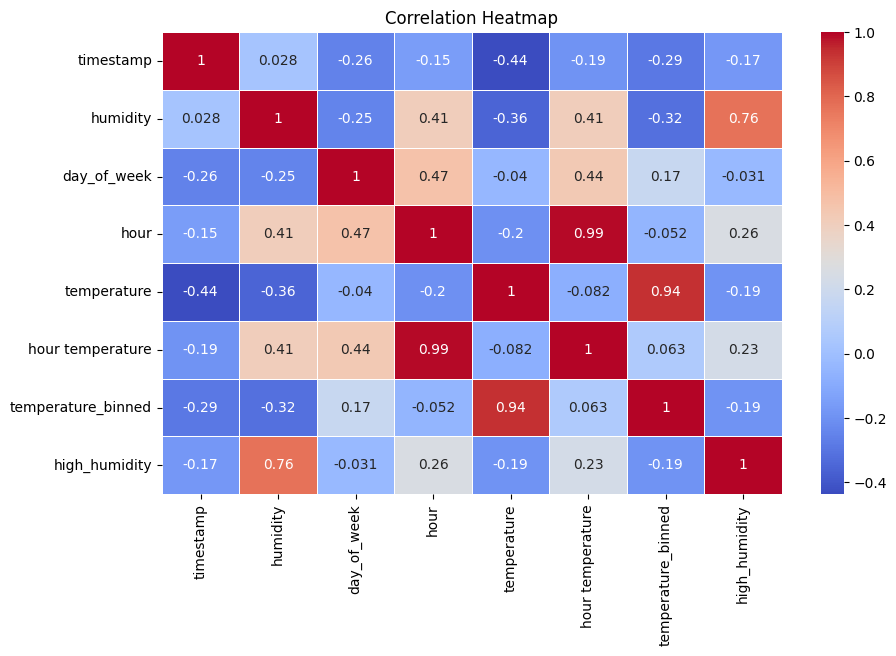

In [29]:
# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# E. Dimensionality Reduction

## 1. Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

## 2. Load and Preprocess the dataset

In [31]:
# Load Iris dataset
data = load_iris()
X = data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3. Visualize Original Data in 2D (Before Reduction)

In [32]:
data.target_names = np.insert(data.target_names, 0, "")

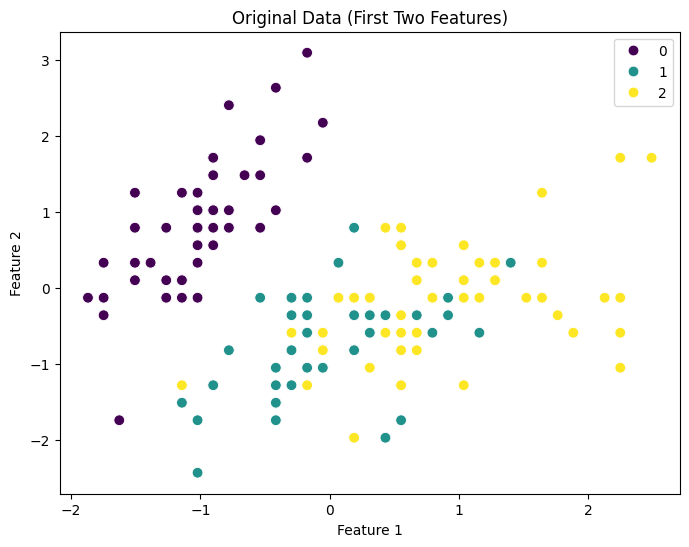

In [33]:
# Plot using first two features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette='viridis', s=60)
plt.title("Original Data (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# plt.legend(data.target_names, title="Classes")
plt.show()

## 4. Dimensionality Reduction with PCA

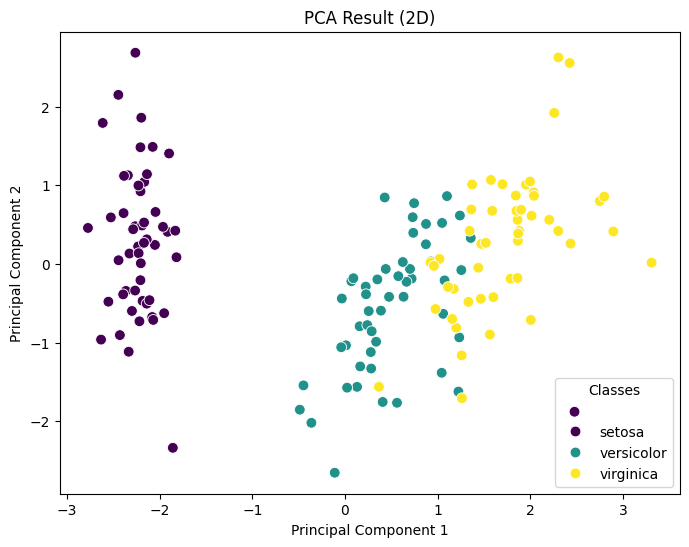

array([0.72962445, 0.22850762])

In [34]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Visualize PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', s=60)
plt.title("PCA Result (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(data.target_names, title="Classes")
plt.show()
pca.explained_variance_ratio_

## 5. Dimensionality Reduction with t-SNE

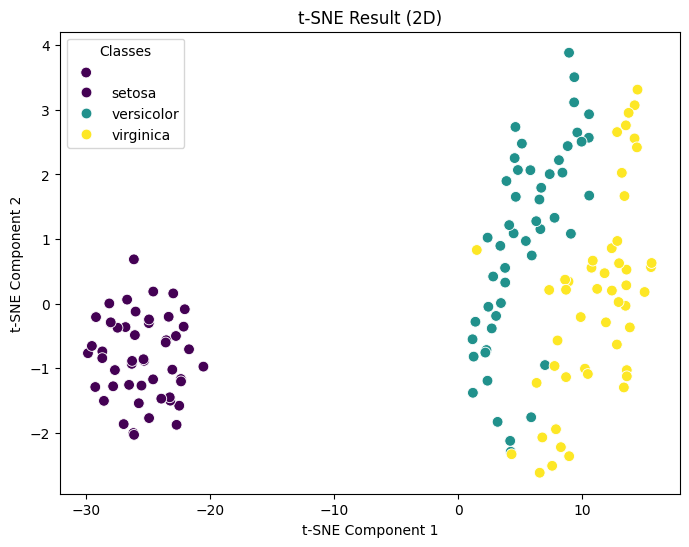

In [35]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
# Visualize t-SNE result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis', s=60)
plt.title("t-SNE Result (2D)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(data.target_names, title="Classes")
plt.show()